<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/Step_By_Step_End_To_End_ML_Project_Procedure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FRAME THE PROBLEM

Analysing the impact of Diet,kind (Kind of exercise),time (time for which the activity is performed) on Pulse rate.

These anaysis will be useful because :

Pulse rate is a critical indicator of cardiovascular health. Various factors, including diet and time elapsed after eating, can influence an individual's pulse rate. Understanding how these factors affect the pulse rate can provide insights into better dietary recommendations and overall health management.

# Select the performance measure

As this will be a regression problem so for finding the accuracy of the model RMSE will be used.

# Check the assumptions that were made so far.

In [2]:
# Getting the data
import pandas as pd
import seaborn as sns

df=sns.load_dataset('exercise')

# Create a workspace so that this project is not obstructed by any other work.

In [4]:
# See the overall structure of the dataset

df.describe(include='all')

,Unnamed: 0,id,diet,pulse,time,kind
count,90.000000,90.000000,90,90.000000,90,90
unique,NaN,NaN,2,NaN,3,3
top,NaN,NaN,no fat,NaN,1 min,rest
freq,NaN,NaN,45,NaN,30,30
mean,44.500000,15.500000,NaN,99.700000,NaN,NaN
std,26.124701,8.703932,NaN,14.858471,NaN,NaN
min,0.000000,1.000000,NaN,80.000000,NaN,NaN
25%,22.250000,8.000000,NaN,90.250000,NaN,NaN
50%,44.500000,15.500000,NaN,96.000000,NaN,NaN
75%,66.750000,23.000000,NaN,103.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [ ]:
df.hist()

# To prevent data snopping bias separate your dataset into test and train.

In [7]:
df.head(2)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest


In [8]:
X=df.drop(columns=['Unnamed: 0','id','pulse'])
y=df['pulse']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

# EDA To know more about the data (Specifically using the training dataset)

In [80]:
dft=pd.concat([X_train,y_train],axis=1)

In [71]:
dft.head()

,diet,time,kind,pulse
54,no fat,1 min,walking,97
82,no fat,15 min,running,124
76,no fat,15 min,running,126
44,low fat,30 min,walking,95
8,low fat,30 min,rest,94


In [17]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 54 to 68
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    72 non-null     category
 1   time    72 non-null     category
 2   kind    72 non-null     category
 3   pulse   72 non-null     int64   
dtypes: category(3), int64(1)
memory usage: 1.7 KB


In [ ]:
dft.isnull().sum()

In [21]:
dft['diet'].value_counts()

diet
no fat     38
low fat    34
Name: count, dtype: int64

In [22]:
dft['kind'].value_counts()

kind
walking    26
running    24
rest       22
Name: count, dtype: int64

In [23]:
dft['time'].value_counts()

time
30 min    26
1 min     24
15 min    22
Name: count, dtype: int64

In [ ]:
dft['pulse'].value_counts()

# Insights

1) Almost balanced dataset (basically for categorical values).

2) Columns to be encoded are kind,diet (they are basically nominal).

3) Time type needs to be changed to int and only extracting number (which is in minutes).

4) No Null Values.


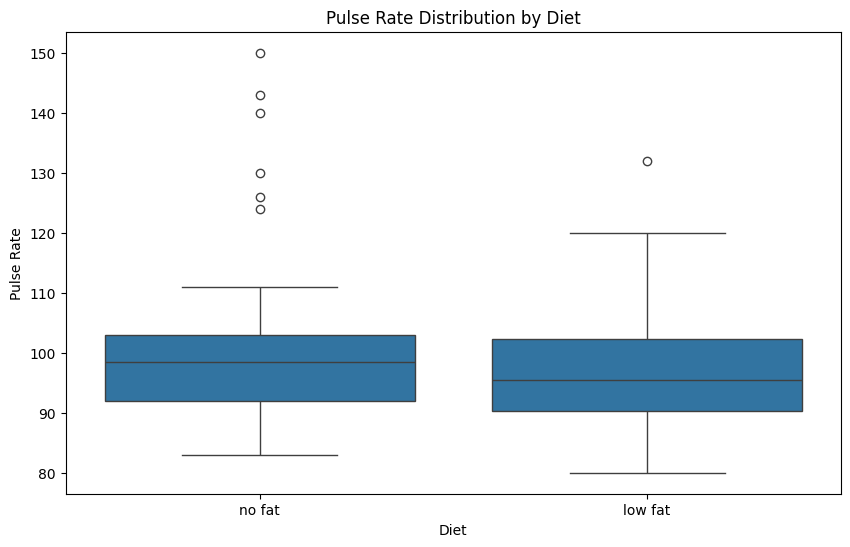

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='diet', y='pulse', data=dft)
plt.title('Pulse Rate Distribution by Diet')
plt.xlabel('Diet')
plt.ylabel('Pulse Rate')
plt.show()


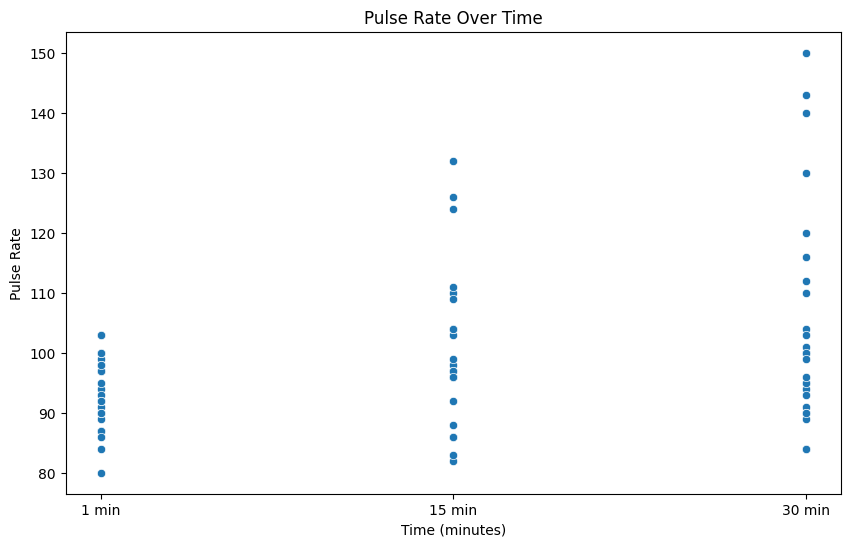

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='pulse', data=dft)
plt.title('Pulse Rate Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Pulse Rate')
plt.show()


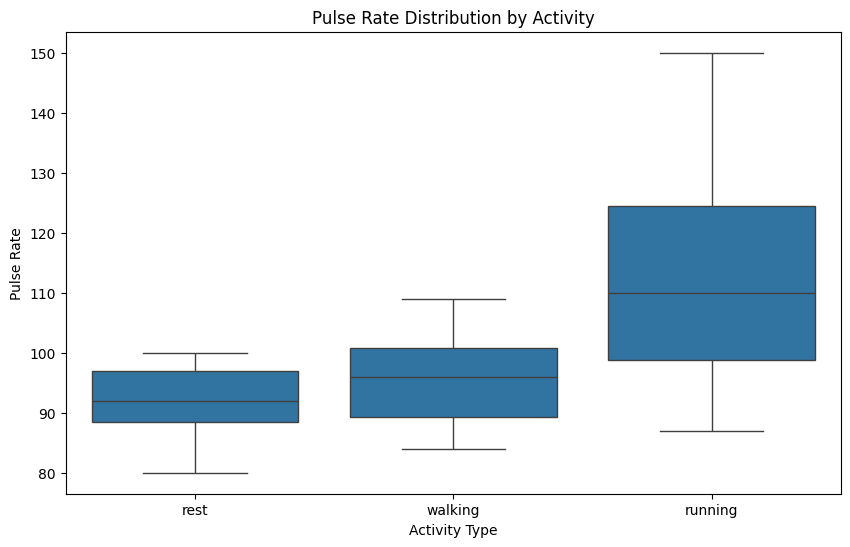

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='kind', y='pulse', data=dft)
plt.title('Pulse Rate Distribution by Activity')
plt.xlabel('Activity Type')
plt.ylabel('Pulse Rate')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


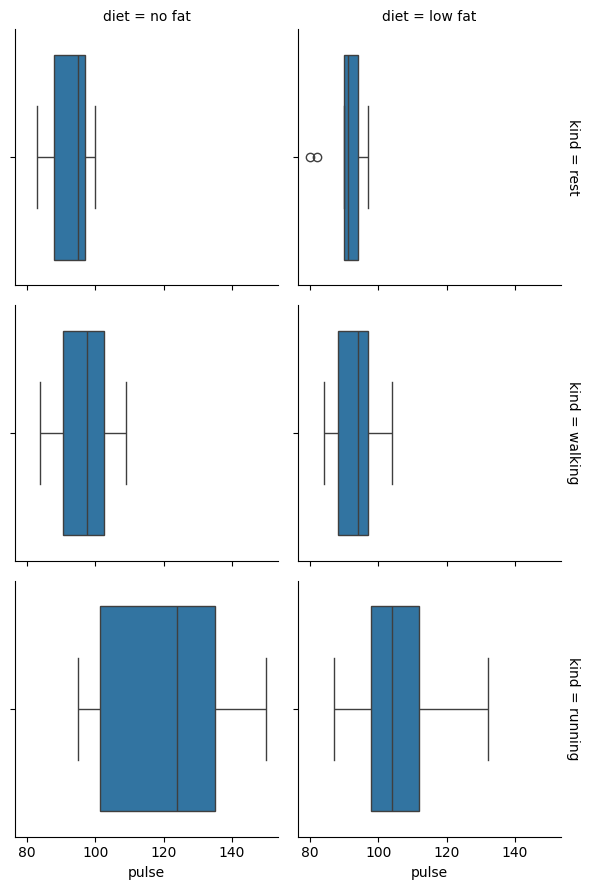

In [28]:
g = sns.FacetGrid(dft, col='diet', row='kind', margin_titles=True)
g.map(sns.boxplot, 'pulse')
plt.show()


In [31]:
import plotly.express as px

fig = px.line(
    dft,
    x='time',
    y='pulse',
    color='diet',
    line_dash='kind',
    markers=True,
    title='Interaction of Diet, Activity, and Time on Pulse Rate'
)

fig.update_layout(
    xaxis_title='Time (minutes)',
    yaxis_title='Pulse Rate',
    legend_title='Diet and Activity'
)

fig.show()


# Insights from the above plot

The plot provides several insights into the interaction of diet, activity, and time on pulse rate:

1. **Initial Pulse Rates**:
   - At the 1-minute mark, pulse rates are relatively close across all groups, with no significant differences based on diet or activity.

2. **Effect of Activity**:
   - **Running**: Both the "no fat, running" and "low fat, running" groups show a significant increase in pulse rate over time, with the "no fat, running" group showing the highest increase, reaching around 150 bpm at the 30-minute mark.
   - **Walking**: The pulse rates for the walking groups ("no fat, walking" and "low fat, walking") increase more gradually compared to running but still show a noticeable upward trend.
   - **Rest**: The groups that are at rest ("no fat, rest" and "low fat, rest") show the least increase in pulse rate, with some minor fluctuations, but overall staying relatively stable.

3. **Effect of Diet**:
   - The "no fat" groups (blue lines) generally have higher pulse rates compared to the "low fat" groups (red lines) for the same activity level, especially noticeable in the running and walking activities.
   - The difference is more pronounced in the running activity, where "no fat, running" consistently has a higher pulse rate than "low fat, running."

4. **Trend Over Time**:
   - The pulse rate generally increases over time for all groups, but the rate of increase varies significantly based on activity.
   - The most significant increase is observed in the running groups, while the least increase is seen in the resting groups.

5. **Consistency Across Conditions**:
   - The resting groups ("no fat, rest" and "low fat, rest") show the most consistent pulse rates over time, with very little variation.
   - Walking groups show moderate consistency, with a gradual increase in pulse rate.
   - Running groups show the least consistency, with a sharp increase over time.

6. **Comparative Insights**:
   - The impact of running on pulse rate is significantly more pronounced than walking or resting, regardless of diet.
   - The type of diet (no fat vs. low fat) also affects the pulse rate, with "no fat" generally leading to higher pulse rates than "low fat" for the same activity level.

These insights suggest that both diet and activity level significantly influence pulse rate, with activity level having a more immediate and pronounced impact.

In [34]:
# let us convert the required columns for getting better insights

# Convert time intervals to numeric
dft['time_int'] = dft['time'].apply(lambda x: int(x.split(' ')[0]))

In [37]:
dft.drop(columns=['time'],inplace=True)

In [40]:
dft.head(2)

,pulse,time_int,kind_rest,kind_walking,kind_running,diet_no fat,diet_low fat
54,97,1,False,True,False,True,False
82,124,15,False,False,True,True,False


In [39]:
# One-hot encode 'kind' and 'diet' columns
dft = pd.get_dummies(dft, columns=['kind', 'diet'])

In [42]:
# now let us go for analysing the corelation
corr_matrix=dft.corr()
corr_matrix['pulse'].drop('pulse').sort_values(ascending=False)

kind_running    0.614627
time_int        0.335022
diet_no fat     0.168408
diet_low fat   -0.168408
kind_walking   -0.248297
kind_rest      -0.370082
Name: pulse, dtype: float64

<Axes: >

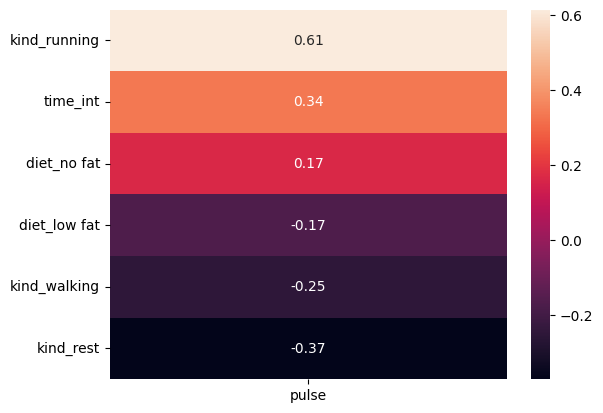

In [44]:
sns.heatmap(pd.DataFrame(corr_matrix['pulse'].drop('pulse').sort_values(ascending=False)),annot=True)

# Starting with Feature Engineering

In [46]:
df.head(2)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest


In [68]:
# Let us make column transforms for transforming the data
# let's apply column transformation
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [56]:
# Making custom transformer for doing a specific work

from sklearn.base import BaseEstimator, TransformerMixin
class TimeIntervalExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()  # Avoid modifying the original DataFrame
        X[self.column + '_int'] = X[self.column].apply(lambda x: int(x.split(' ')[0]))
        return X[[self.column + '_int']]  # Return only the new column


In [75]:
# Define the pipeline for time processing
from sklearn.pipeline import Pipeline
time_pipeline = Pipeline([
    ('time_extractor', TimeIntervalExtractor(column='time')),
    ('scaler', StandardScaler())
])

In [77]:
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='most_frequent'), ['diet', 'kind']),
        ('time_pipeline', time_pipeline, ['time']),
        ('encoder', OneHotEncoder(sparse=False, drop='first'), ['diet', 'kind'])
    ],
    remainder='passthrough'
)

In [89]:
# Apply the transformations
dft_transformed = preprocessor.fit_transform(dft)

# # Access the OneHotEncoder to get feature names
# encoder = preprocessor.named_transformers_['encoder']
# diet_kind_encoded_names = encoder.get_feature_names_out(['diet', 'kind'])

# # Combine all feature names
# column_names = ['diet_imputed', 'kind_imputed'] + list(diet_kind_encoded_names) + ['time_int_scaled']

# # Convert the transformed data back to a DataFrame for easier interpretation
# dft_transformed_df = pd.DataFrame(dft_transformed, columns=column_names)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [90]:
dft_transformed=pd.DataFrame(dft_transformed)

In [92]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [93]:
models={
    'Linear Regression':LinearRegression(),
    'SVR':SVR(),
    'Tree Regressor':DecisionTreeRegressor()

}

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
def evaluate_model(X_train,y_train,models):

    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)



        # Predict Testing data
        y_test_pred =model.predict(X_train)

        # Get accuracy for test data prediction

        test_model_score = r2_score(y_train,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score



    return report


In [91]:
dft_transformed.head(2)

,0,1,2,3,4,5,6
0,no fat,walking,-1.220632,1.0,0.0,1.0,97
1,no fat,running,-0.062066,1.0,1.0,0.0,124


In [106]:
evaluate_model(dft_transformed.drop(columns=[0,1,6]),dft_transformed[6],models)

{'Linear Regression': 0.5533808436782217,
 'SVR': 0.23907091490616517,
 'Tree Regressor': 0.8025812920893804}

In [97]:
# prompt: i want to cross validate all the models for overfitting

from sklearn.model_selection import cross_val_score

for name, model in models.items():
  scores = cross_val_score(model, dft_transformed.drop(columns=[0,1,6]), dft_transformed[6], cv=5)
  print(f"Model: {name}, CV Scores: {scores}, Mean Score: {scores.mean():.3f}")


Model: Linear Regression, CV Scores: [ 0.63829553  0.62731039  0.50110845  0.50372878 -0.30992031], Mean Score: 0.392
Model: SVR, CV Scores: [0.14945017 0.09047823 0.12630734 0.06660725 0.10275261], Mean Score: 0.107
Model: Tree Regressor, CV Scores: [ 0.60431686  0.69767174  0.69446417  0.71732149 -0.44139853], Mean Score: 0.454


# Using Ensemble techniques for getting better performance


In [103]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [104]:
models_ensemble={
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [ ]:
models_ensemble = {
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'XGBRegressor': XGBRegressor()
}

# Debugging print statements
print("Unique values in target labels:", dft_transformed[6].unique())
print("Data type of target labels:", type(dft_transformed[6]))

evaluate_model(dft_transformed.drop(columns=[0, 1, 6]), dft_transformed[6], models_ensemble)


# Hypertuning the parameters for increasing accuracy

# Finally evaluating on test dataset and finding accuracy

# Finally deploying